## <div style = 'text-align: center'>Индивидуальное домашнее задание по статистическому анализу №4</div>

Выполнил: Ибатов Николай Эдуардович

Вариант 5.

**1.**

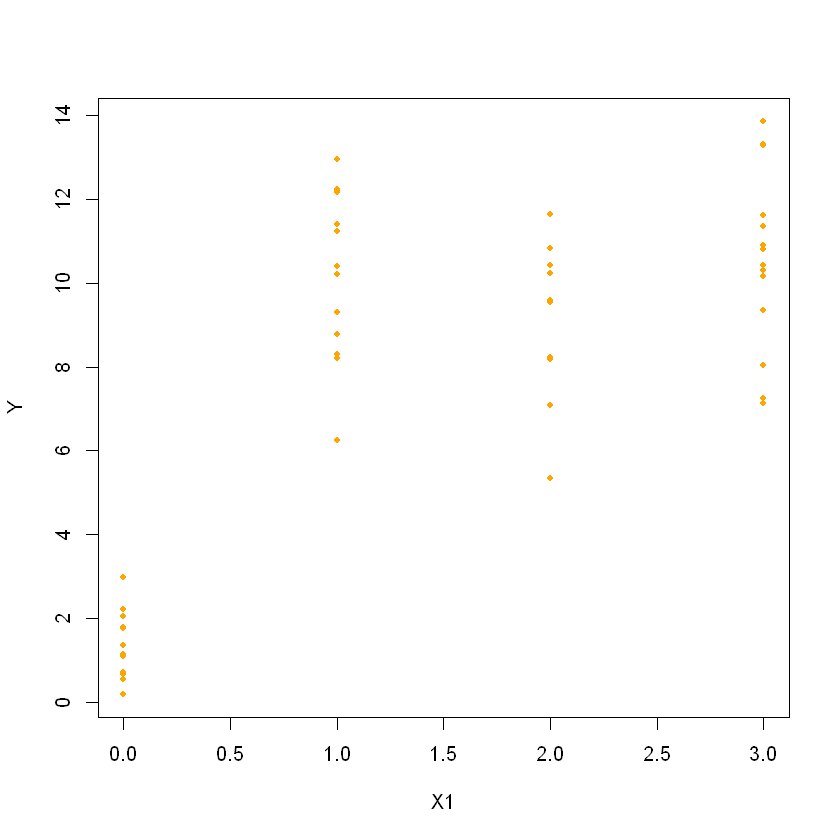

In [18]:
Y<-c(2.22,9.55,10.23,8.20,10.21,12.16,0.19,8.18,9.34,8.04,13.31,10.42,10.43,12.94,8.77,12.24,11.62,8.24,11.23,10.41,0.66,10.30,2.99,11.63,2.06,1.36,12.21,7.25,9.30,10.82,10.91,11.35,0.54,1.79,1.76,0.72,13.29,6.25,10.17,7.08,13.86,9.59,7.14,1.09,8.30,10.81,1.15,11.39,5.35,1.11)
X1<-c(0,2,2,1,1,1,0,2,3,3,3,2,3,1,1,1,3,2,1,1,0,3,0,2,0,0,1,3,1,2,3,3,0,0,0,0,3,1,3,2,3,2,3,0,1,3,0,1,2,0)
a1<-0.02
h<-1.20

plot(X1,Y, col="orange",pch=20)
X<-factor(X1)

**2.**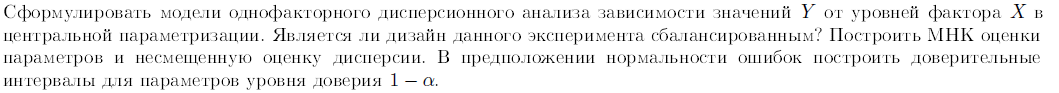

$(Y_1, x_1), ..., (Y_n,x_n)$ - набор наблюдений

Модель:

$E_\theta(Y | x=i)=\eta_i$

$Y_{ij}$ - j-е наблюдение в i-й группе

$Y_{i1}, ..., Y_{in_i}$ - выборка из $N(\eta_i,\sigma^2)$

Если $n_1=n_2=...=n_n$, то модель называется сбалансированной.

$\epsilon_{ij} = Y_{ij} - \eta_i$

$||\epsilon|| \rightarrow min$

$||\epsilon|| = \sum_{ij}(Y_{ij}-\eta_i)^2$

$\hat{\eta_i}=\frac{\sum_{i=1}^{n_i}Y_i}{n_i}$ - оценкой для параметров является выборочное среднее в группе.

$\hat\eta_{i} \sim N(\eta_i,\frac{\sigma^2}{n_i})$

Несмещенная оценка дисперсии имеет вид

$\hat{\sigma}^2 = \frac{||\epsilon||}{n-r}=\frac{||Y - X^T\beta||}{n-r}=\frac{S^2}{n-r}$

Стандартное нормальное распределение:
$$\widehat{\eta_i} \sim N(\eta_i, \frac{\sigma^2}{n_i})$$
$$\frac{\widehat{\eta_i}-\eta_i}{\sqrt{\frac{\sigma^2}{n_i}}} \sim N(0, 1)$$

$$\chi^2: \frac{(n-r)S^2}{\sigma^2} \sim \chi_{n-r}^2$$
Распределение Cтьюдента:
$$\frac{\frac{\widehat{\eta_i}-\eta_i}{\sqrt{\frac{\sigma^2}{n_i}}}}{\sqrt{\frac{1}{n-r}\frac{(n-r)S^2}{\sigma^2}}} \sim S_{n-r}$$

Получаем:

$$\frac{\widehat{\eta_i}-\eta_i}{\sqrt{\frac{S^2}{n_i}}} \sim S_{46}$$

$$P(-X_{\alpha/2} < \frac{\widehat{\eta_i}-\eta_i}{\sqrt{\frac{S^2}{n_i}}} < X_{\alpha/2} ) = 1 -\alpha$$

$$P(\widehat{\eta}-X_{\alpha/2}\sqrt{\frac{S^2}{n_i}} < \eta < \widehat{\eta}+X_{\alpha/2}\sqrt{\frac{S^2}{n_i}} ) = 1 -\alpha$$


In [19]:
gs<-aggregate(Y,list(X),FUN=length)
gs
gs<-gs$x

Group.1,x
<fct>,<int>
0,13
1,13
2,10
3,14


In [20]:
tmp<-aggregate(Y,list(X),FUN=mean)
tmp
means<-tmp$x

Group.1,x
<fct>,<dbl>
0,1.356923
1,10.277692
2,9.109000
3,10.558571


In [22]:
f1<-function(group) {
    mean<-mean(group)
    return ((group-mean)^2)
}

n<-length(Y)

lst<-aggregate(Y,list(X),FUN=f1)$x

ssq<-sum(sapply(lst, sum))
ssq/(n-4)

[1] 3.185391

In [23]:
q <- qt(1-a1/2,n-4) * sqrt(ssq/gs)  
df<-data.frame(levels(X),"left"=means-q,"right"=means+q)
df

levels.X.,left,right
<chr>,<dbl>,<dbl>
0,-6.7347723,9.448618
1,2.1859969,18.369388
2,-0.1169522,18.334952
3,2.7612186,18.355924


**3.**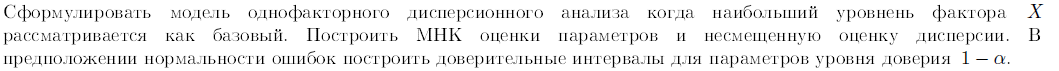

$E(Y_{ij} |(z_i=j))=\mu + \alpha_i$

$Y_{ij} \sim N(\mu + \alpha_i,\sigma_i^2)$

$\mu + \alpha_i=\eta_i$

$\mu = \eta_4$

$\epsilon_{ij} = Y_{ij} - \mu - \alpha_i$

$||\epsilon|| \rightarrow min$

$||\epsilon|| = \sum_{ij}(Y_{ij}-\mu - \alpha_i)^2$

$\hat{\eta_i}=\frac{\sum_{i=1}^{n_i}Y_i}{n_i}$ - оценкой для параметров является выборочное среднее в группе.

$\hat\mu = \hat\eta_4$

$\hat\alpha_i=\hat\eta_i - \hat\mu$

$\hat\mu \sim N(\mu,\frac{\sigma^2}{n_4})$

$\hat a_{i} \sim N(\eta_i - \mu,\sigma^2\frac{n_4+n_i}{n_in_4})$

Несмещенная оценка дисперсии имеет вид

$\hat{\sigma}^2 =\frac{\sum(Y_{ij} - \mu - \alpha_i)^2}{n-r}$

$S^2=\sum(Y_{ij} - \eta_i + \mu)^2$


Стандартное нормальное распределение:
$$\widehat{a_{i}} \sim N(\eta_i - \mu, \sigma^2\frac{n_4+n_i}{n_in_4})$$
$$\frac{\widehat{a_i}-\eta_i + \mu}{\sqrt{\sigma^2\frac{n_4+n_i}{n_in_4}}} \sim N(0, 1)$$

$$\chi^2:\frac{(n-r)S^2}{\sigma^2} \sim \chi_{n-r}^2$$
Распределение Cтьюдента:
$$\frac{\frac{\widehat{a_i}-\eta_i + \mu}{\sqrt{\sigma^2\frac{n_4+n_i}{n_in_4}}}}{\sqrt{\frac{1}{n-r}\frac{(n-r)S^2}{\sigma^2}}} \sim S_{n-r}$$

Получаем:

$$\frac{\widehat{a_i}-\eta_i + \mu}{\sqrt{\frac{n_4+n_i}{n_in_4}S^2}} \sim S_{46}$$

$$P(-X_{\alpha/2} < \frac{\widehat{a_i}-\eta_i + \mu}{\sqrt{\frac{n_4+n_i}{n_in_4}S^2}} < X_{\alpha/2} ) = 1 -\alpha$$

$$P(\hat\eta_i - \hat\mu-X_{\alpha/2}\sqrt{\frac{n_4+n_i}{n_in_4}S^2} < a_i < \hat\eta_i - \hat\mu+X_{\alpha/2}\sqrt{\frac{n_4+n_i}{n_in_4}S^2} ) = 1 -\alpha$$



In [24]:
mu<-means[4]
cat("mu",mu, "\n")
a<-means-mu
df<-data.frame(levels(X),a)
df

f2<-function(group) {
    a<-mean(group)-mu
    return ((group-mu-a)^2)
}

n<-length(Y)

lst<-aggregate(Y,list(X),FUN=f2)$x

ssq<-sum(sapply(lst, sum))
ssq/(n-4)

q <- qt(1-a1,n-4) * sqrt((gs+gs[4])*ssq/(gs*gs[4]))  
df<-data.frame(levels(X),"left"=means-mu-q,"right"=means-mu+q)
df

mu 10.55857 


levels.X.,a
<chr>,<dbl>
0,-9.2016484
1,-0.2808791
2,-1.4495714
3,0.0000000


[1] 3.185391

levels.X.,left,right
<chr>,<dbl>,<dbl>
0,-19.056194,0.6528973
1,-10.135425,9.5736666
2,-12.042890,9.1437469
3,-9.670332,9.6703323


**4.**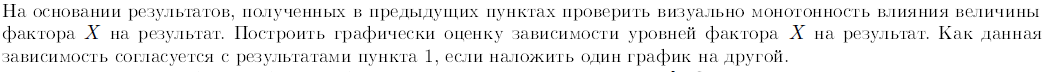

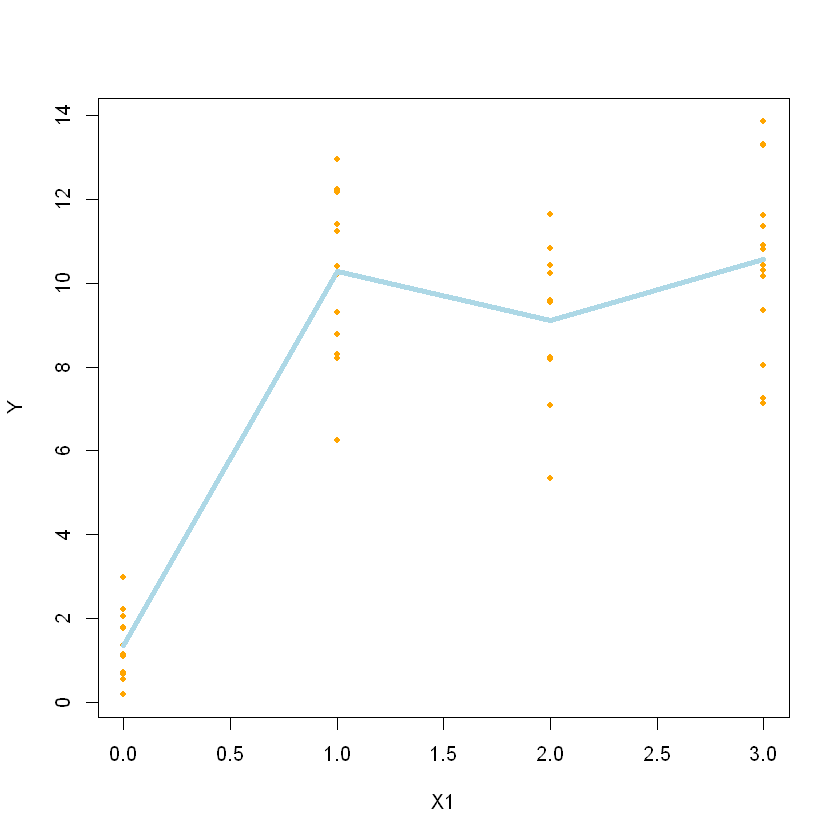

In [28]:
plot(X1, Y, col="orange",pch=20)
lines(c(0:3), means, 'l',lwd=4, col="lightblue")

**5.**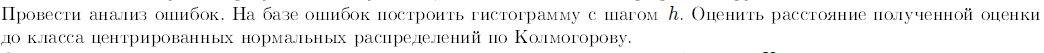

[1] 0.4853669

[1] 2.203057

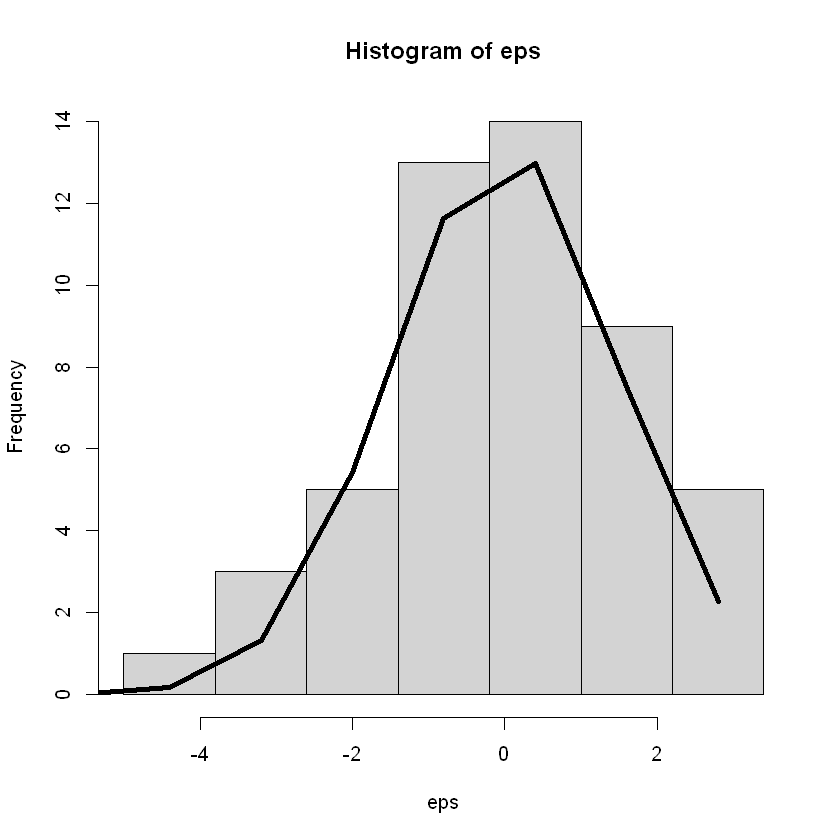

In [32]:
f3<-function(group) {
    mean<-mean(group)
    return (group-mean)
}

n<-length(Y)

eps<-sort(unlist(aggregate(Y,list(X),FUN=f3)$x))
hist(eps,breaks=seq(-5,4,h))
lines(seq(-5,4,h)-h/2,n* dnorm(seq(-5,4,h)-h/2, 0, sqrt(2.20305745514541)), 'l',lwd=4)

i<-1:n
v2<-(i-1)/n
v3<-i/n

ks <- function(p){
  p0 <- pnorm(eps, 0, p)
  return(max(abs(v2-p0), abs(v3-p0)))
}
nlm<-nlm(ks,sqrt(var(eps)))
sqrt(n)*nlm$minimum
nlm$estimate^2

**6.**

$SST = SSW + SSB$

$SSW = \sum_{ij}(Y_{ij}-\bar Y_{i+})^2$

$SSB = \sum_{ij}n_i(\bar Y_{i+}-\bar Y_{++})^2$

In [35]:
f4<-function(group) {
    mean<-mean(group)
    return ((group-mean)^2)
}

g.mean<-mean(Y)

n<-length(Y)
tmp<-aggregate(Y,list(X),FUN=f4)$x
lst<-sapply(tmp, sum)

r<-length(levels(X))

DOF<-c(n-r,r-1,n-1)
sum.sq<-c(sum(lst),sum(gs*(means-g.mean)^2),sum(lst)+sum(gs*(means-g.mean)^2))
mean.sq<-sum.sq/DOF

table<-data.frame("source"=c("Внутри групп","Между группами","Всего"),sum.sq,DOF)
table

source,sum.sq,DOF
<chr>,<dbl>,<dbl>
Внутри групп,146.5280,46
Между группами,743.1489,3
Всего,889.6769,49
